In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pyedfread import edf
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from celluloid import Camera
import numpy as np

In [2]:
# cap = cv2.VideoCapture('20180922012536_0017.MP4')
# idx = 0
# while(cap.isOpened()):
#     # Capture frame-by-frame
#     ret, frame = cap.read()
#     if  not ret:
#         break

#     # Our operations on the frame come here
# #     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # Display the resulting frame
#     cv2.imwrite("video_data/{:04d}.png".format(idx),frame)
#     idx += 1

# # When everything done, release the capture
# cap.release()
# cv2.destroyAllWindows()

In [3]:
video_data_dir = "video_data/{:04d}.png"
start_idx = 5822
end_idx   = 6974
owx = [190, 700] # offset window x
owy = [580,1610] # offset window x

In [4]:
def get_circle(frame_idx, debug=True):
    image = cv2.imread(video_data_dir.format(5897))
    image = image[owx[0]:owx[1], owy[0]:owy[1], :]
    output = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 25)


    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 3, 100, param1=50, param2=70)
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    if debug:
        output_dir = 'video_data_circle/{:04d}.png'
        cv2.imwrite(output_dir.format(frame_idx),output)
    if circles is not None:
        return circles[0]
    else:
        return None


In [5]:
circles_data = pd.read_csv('circles.txt', delimiter=',',dtype=np.int)
circles_data.head(10)

,begin_idx,end_idx,x,y
0,5897,6014,698,640
1,6015,6135,1205,634
2,6136,6255,712,204
3,6256,6375,696,404
4,6376,6495,1191,394
5,6496,6615,1166,195
6,6616,6735,1610,616
7,6736,6855,1591,410
8,6856,6973,1547,227


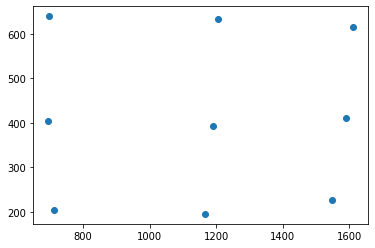

In [6]:
plt.scatter(circles_data['x'], circles_data['y'])

In [7]:
samples,events,messages = edf.pread('testDone.edf', trial_marker=b'dot pos:')

In [8]:
messages.head()

,DISPLAY_COORDS,DISPLAY_COORDS_time,RECCFG,RECCFG_time,ELCLCFG,ELCLCFG_time,GAZE_COORDS,GAZE_COORDS_time,THRESHOLDS,THRESHOLDS_time,...,ELCL_PROC_time,ELCL_EFIT_PARAMS,ELCL_EFIT_PARAMS_time,!MODE,!MODE_time,Start,Start_time,py_trial_marker,trialid,trialid_time
0,"[0.0, 0.0, 1680.0, 1050.0]",5429310.0,"[CR, 500, 2, 1, L]",5429363.0,MTABLER,5429363.0,"[0.0, 0.0, 1680.0, 1050.0]",5429363.0,"[L, 45, 210]",5429363.0,...,5429363.0,"[1.01, 4.00, , 0.15, 0.05, , 0.65, 0.65, , 0.0...",5429363.0,"[RECORD, CR, 500, 2, 1, L\n]",5429364.0,"[Trial, 1614146099.67]",5429399.0,-1,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"dot pos: [-672. -420.], time: 1614146099.72",5429449.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,"dot pos: [-672. -420.], time: 1614146101.67",5431401.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"dot pos: [ 0. -420.], time: 1614146103.68",5433406.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,"dot pos: [-672. 420.], time: 1614146105.68",5435411.0


In [9]:
events.head()

,time,type,start,end,hstx,hsty,gstx,gsty,sta,henx,...,pvel,svel,evel,supd_x,eupd_x,eye,buttons,message,blink,trial
0,0,fixation,5429369,5429669,-170.0,-615.0,811.500000,361.200012,2763.0,-168.0,...,15.600000,1.200000,2.3,43.599998,43.599998,0,0,,False,-1
1,0,saccade,5429671,5429729,-169.0,-586.0,811.700012,366.200012,0.0,-3744.0,...,558.700012,2.300000,2.6,43.599998,48.900002,0,0,,False,1
2,0,fixation,5429731,5430055,-3735.0,2609.0,191.300003,930.299988,3108.0,-3851.0,...,46.099998,29.500000,6.6,48.900002,49.000000,0,0,,False,1
3,0,saccade,5430057,5430085,-3858.0,2558.0,170.199997,921.099976,0.0,-4005.0,...,149.000000,10.100000,21.4,49.000000,49.400002,0,0,,False,1
4,0,fixation,5430087,5431639,-4031.0,2713.0,138.899994,949.500000,3067.0,-4001.0,...,29.799999,29.799999,13.2,49.400002,49.299999,0,0,,False,1


In [10]:
samples.head()

,time,px_left,px_right,py_left,py_right,hx_left,hx_right,hy_left,hy_right,pa_left,...,fgyvel,fhxyvel,fhyvel,frxyvel,fryvel,flags,input,buttons,htype,errors
0,5429365.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,2770.0,...,1.000000e+08,100000000.0,100000000.0,100000000.0,100000000.0,42945.0,0.0,0.0,-32768.0,0.0
1,5429367.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,2772.0,...,1.000000e+08,100000000.0,100000000.0,100000000.0,100000000.0,34753.0,0.0,0.0,-32768.0,0.0
2,5429369.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,2763.0,...,1.000000e+08,100000000.0,100000000.0,100000000.0,100000000.0,34753.0,0.0,0.0,-32768.0,0.0
3,5429371.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,2761.0,...,1.000000e+08,100000000.0,100000000.0,100000000.0,100000000.0,34753.0,0.0,0.0,-32768.0,0.0
4,5429373.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,2770.0,...,-5.236445e+00,100000000.0,100000000.0,100000000.0,100000000.0,34753.0,0.0,0.0,-32768.0,0.0


In [11]:
a = events[events['type']=='fixation']
a = a[['gavx', 'gavy', 'start', 'end']].iloc[1:]
a.head(10)

,gavx,gavy,start,end
2,168.300003,920.500000,5429731,5430055
4,139.100006,941.400024,5430087,5431639
6,831.500000,957.200012,5431705,5432221
8,833.400024,937.599976,5432245,5433627
10,240.300003,44.099998,5433715,5434045
12,181.800003,24.000000,5434069,5435655
14,165.600006,521.599976,5435707,5437609
16,805.000000,535.599976,5437673,5438503
18,862.500000,555.299988,5438533,5439567
20,818.299988,107.099998,5439631,5440105


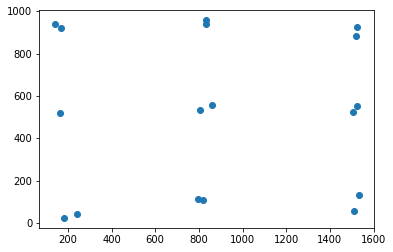

In [12]:
# plt.figure(figsize=(16, 16))
plt.scatter(a['gavx'], a['gavy'])

In [13]:
filtered_samples = samples[samples['time']>5429731]
b = filtered_samples[['gx_left','gy_left', 'time']]
b.head()

,gx_left,gy_left,time
184,191.600006,923.400024,5429733.0
185,188.199997,915.500000,5429735.0
186,182.000000,916.299988,5429737.0
187,177.500000,918.900024,5429739.0
188,173.300003,919.599976,5429741.0


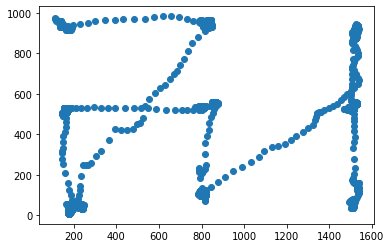

In [14]:
plt.scatter(b['gx_left'], b['gy_left'])

Uncomment these lines to have the gif files generated

In [15]:
# # create figure object
# fig = plt.figure()
# # load axis box
# ax = plt.axes()
# # set axis limit
# ax.set_ylim(0, 800)
# ax.set_xlim(0, 2000)

# camera = Camera(fig)
# x = circles_data['x'].to_numpy()
# y = circles_data['y'].to_numpy()
# assert x.shape == y.shape
# for i in range(len(x)):
#     if i%1000 == 0:
#         print(i)
#     ax.scatter(x[i],y[i])
#     plt.pause(0.1)
#     camera.snap()

# animation = camera.animate()
# animation.save('animation_pixel.gif', writer='PillowWriter', fps=2)

In [16]:
# # create figure object
# fig = plt.figure()
# # load axis box
# ax = plt.axes()
# # set axis limit
# ax.set_ylim(0, 1000)
# ax.set_xlim(0, 1600)

# camera = Camera(fig)
# x = a['gavx'].to_numpy()
# y = a['gavy'].to_numpy()
# assert x.shape == y.shape
# for i in range(len(x)):
#     if i%1000 == 0:
#         print(i)
#     ax.scatter(x[i],y[i])
#     plt.pause(0.1)
#     camera.snap()

# animation = camera.animate()
# animation.save('animation_events.gif', writer='PillowWriter', fps=2)

In [17]:
# from matplotlib import pyplot as plt
# from celluloid import Camera
# import numpy as np


# # create figure object
# fig = plt.figure()
# # load axis box
# ax = plt.axes()
# # set axis limit
# ax.set_ylim(0, 1000)
# ax.set_xlim(0, 1600)

# camera = Camera(fig)
# x = b['gx_left'].to_numpy()
# y = b['gy_left'].to_numpy()
# assert x.shape == y.shape
# for i in range(len(x)):
#     if i%1000 == 0:
#         print(i)
#     ax.scatter(x[i],y[i])
#     plt.pause(0.1)
#     camera.snap()

# animation = camera.animate()
# animation.save('animation.gif', writer='PillowWriter', fps=60)

# Interpolation from Eye_gaze to camera pixel

In [18]:
fixation_time = a[['start', 'end']].to_numpy()
def check_is_fixation(data):
    for i in fixation_time:
        if (data >= i[0] and data <= i[1]):
            return True
    return False
a1 = [check_is_fixation(s) for s in samples['time'].to_numpy()]
a1 = samples[a1]

In [19]:
a1.head()

,time,px_left,px_right,py_left,py_right,hx_left,hx_right,hy_left,hy_right,pa_left,...,fgyvel,fhxyvel,fhyvel,frxyvel,fryvel,flags,input,buttons,htype,errors
183,5429731.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,3108.0,...,-22.883860,100000000.0,100000000.0,100000000.0,100000000.0,34753.0,0.0,0.0,-32768.0,0.0
184,5429733.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,3106.0,...,-44.230625,100000000.0,100000000.0,100000000.0,100000000.0,34753.0,0.0,0.0,-32768.0,0.0
185,5429735.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,3101.0,...,-27.420950,100000000.0,100000000.0,100000000.0,100000000.0,34753.0,0.0,0.0,-32768.0,0.0
186,5429737.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,3084.0,...,-0.591752,100000000.0,100000000.0,100000000.0,100000000.0,34753.0,0.0,0.0,-32768.0,0.0
187,5429739.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,3064.0,...,11.834320,100000000.0,100000000.0,100000000.0,100000000.0,34753.0,0.0,0.0,-32768.0,0.0


In [20]:
cam = circles_data[['x', 'y']].to_numpy()
data = []
label = []
x = a1['gx_left'].to_numpy()
y = a1['gy_left'].to_numpy()
assert(x.shape == y.shape)
for i in range(len(x)):
    data.append([x[i],y[i]])
    if (y[i]<200):
        if(x[i]<400):
            label.append(cam[2])
        elif(x[i]<1000):
            label.append(cam[5])
        else:
            label.append(cam[8])
    elif (y[i]<700):
        if(x[i]<400):
            label.append(cam[3])
        elif(x[i]<1000):
            label.append(cam[4])
        else:
            label.append(cam[7])
    else:
        if(x[i]<400):
            label.append(cam[0])
        elif(x[i]<1000):
            label.append(cam[1])
        else:
            label.append(cam[6])
reg = LinearRegression().fit(data, label)
print("Interpolate eyegaze to camera:")
print("R2 score (coefficient of determination):", reg.score(data, label))
print(reg.coef_, reg.intercept_)

Interpolate eyegaze to camera:
R2 score (coefficient of determination): 0.9878584150473961
[[ 0.65248287  0.03731046]
 [-0.00237894  0.48403046]] [593.53212474 167.94787323]


In [21]:
predict = reg.predict(data)
s = np.sqrt(np.sum((predict-label)**2, axis=-1))
print("l2 distance: mean:", np.mean(s), "std:", np.std(s))

l2 distance: mean: 34.18436724112299 std: 14.7042543520574


# Alignment

In [22]:
messages['trialid_time'][1]

5429449.0

Assume this is the timestamp of the first dot

In [23]:
a = events[['gavx', 'gavy', 'start', 'end', 'type']]
a.head(10)
b = samples[samples['time']>=messages['trialid_time'][1]][['gx_left','gy_left', 'time']]

In [24]:
b[['x_cam', 'y_cam']] = reg.predict(b[['gx_left','gy_left']])
b.head()

,gx_left,gy_left,time,x_cam,y_cam
42,812.299988,366.000000,5429449.0,1137.199584,343.170610
43,812.200012,365.299988,5429451.0,1137.108234,342.832021
44,811.799988,364.899994,5429453.0,1136.832301,342.639363
45,811.599976,365.100006,5429455.0,1136.709259,342.736651
46,811.599976,364.799988,5429457.0,1136.698065,342.591433


In [25]:
image = cv2.imread(video_data_dir.format(5898))
output = image.copy()
cv2.circle(output, (698,640), 25, (0, 255, 0), 4)
cv2.line(output, (698 - 1, 640), (698 + 1, 640), (0, 128, 255), 1)
cv2.line(output, (698, 640 - 1), (698, 640 + 1), (0, 128, 255), 1)
cv2.imwrite('a.png', output)
image.shape

(1080, 1920, 3)

This block is to have the video of end result

In [52]:
# out = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 60, (1920,1080))

# by3 = 0
# current_idx = 0

# data = []
# label = []

# def which_circle(frame_index, tmp):
#     circle = []
#     eyegaze = []
#     for i in circles_data.to_numpy():
#         if (frame_index >= i[0]) and (frame_index <= i[1]):
#             circle = [i[2], i[3]]
#     if len(circle) == 0:
#         return [0,0], [0,0]
#     tmp1 = [check_is_fixation(s) for s in tmp['time']]
#     for i in tmp1:
#         if (not i):
#             return [0,0], [0,0]
#     x_cam = tmp['x_cam'].to_numpy()
#     y_cam = tmp['y_cam'].to_numpy()
#     x_cam_mean = int(np.mean(x_cam))
#     y_cam_mean = int(np.mean(y_cam))
#     eyegaze = [x_cam_mean, y_cam_mean]
#     return circle, eyegaze

# for i in range(5896-15, 6980):           
#     image = cv2.imread(video_data_dir.format(i))
#     output = image.copy()
#     if (current_idx < len(b)): 
#         by3 += 1
#         if (by3%3 == 0):
#             if (current_idx+9 >= len(b)):
#                 tmp = b.iloc[current_idx:len(b)]
#                 current_idx = len(b)
#             else:
#                 tmp = b.iloc[current_idx:current_idx+9]
#                 current_idx += 9
#         else:
#             if (current_idx+8 >= len(b)):
#                 tmp = b.iloc[current_idx:len(b)]
#                 current_idx = len(b)
#             else:
#                 tmp = b.iloc[current_idx:current_idx+8]
#                 current_idx += 8
#         x_cam = tmp['x_cam'].to_numpy()
#         y_cam = tmp['y_cam'].to_numpy()
#         x_cam_mean = int(np.mean(x_cam))
#         y_cam_mean = int(np.mean(y_cam))
#         x_cam_std  = int(np.std(x_cam))
#         y_cam_std  = int(np.std(y_cam))
        
#         circle, eyegaze = which_circle(i, tmp)
#         data.append(eyegaze)
#         label.append(circle)
        
#         cv2.circle(output, (x_cam_mean, y_cam_mean), 25, (0, 255, 0), 4)
#         cv2.line(output, (x_cam_mean - x_cam_std, y_cam_mean), (x_cam_mean + x_cam_std, y_cam_mean), (0, 128, 255), 1)
#         cv2.line(output, (x_cam_mean, y_cam_mean - y_cam_std), (x_cam_mean, y_cam_mean + y_cam_std), (0, 128, 255), 1)
#     cv2.imwrite('output/{}.png'.format(i), output)
#     out.write(output)

# out.release()
# cv2.destroyAllWindows()

# data1 = np.asarray(data)
# label1 = np.asarray(label)
# s = np.sqrt(np.sum((data1-label1)**2, axis=-1))
# print("l2 distance: mean:", np.mean(s), "std:", np.std(s))

This block is to have the full mean std from -50 to 50 from start index 5896 (which is the frame of the first dot)

In [47]:
# def which_circle(frame_index, tmp):
#     circle = []
#     eyegaze = []
#     for i in circles_data.to_numpy():
#         if (frame_index >= i[0]) and (frame_index <= i[1]):
#             circle = [i[2], i[3]]
#     if len(circle) == 0:
#         return [0,0], [0,0]
#     tmp1 = [check_is_fixation(s) for s in tmp['time']]
#     for i in tmp1:
#         if (not i):
#             return [0,0], [0,0]
#     x_cam = tmp['x_cam'].to_numpy()
#     y_cam = tmp['y_cam'].to_numpy()
#     x_cam_mean = int(np.mean(x_cam))
#     y_cam_mean = int(np.mean(y_cam))
#     eyegaze = [x_cam_mean, y_cam_mean]
#     return circle, eyegaze

# for k in range(-50, 51, 5):
#     by3 = 0
#     current_idx = 0
#     data = []
#     label = []
#     for i in range(5896+k, 6980):           
#         image = cv2.imread(video_data_dir.format(i))
#         output = image.copy()
#         if (current_idx < len(b)): 
#             by3 += 1
#             if (by3%3 == 0):
#                 if (current_idx+9 >= len(b)):
#                     tmp = b.iloc[current_idx:len(b)]
#                     current_idx = len(b)
#                 else:
#                     tmp = b.iloc[current_idx:current_idx+9]
#                     current_idx += 9
#             else:
#                 if (current_idx+8 >= len(b)):
#                     tmp = b.iloc[current_idx:len(b)]
#                     current_idx = len(b)
#                 else:
#                     tmp = b.iloc[current_idx:current_idx+8]
#                     current_idx += 8
#             x_cam = tmp['x_cam'].to_numpy()
#             y_cam = tmp['y_cam'].to_numpy()
#             x_cam_mean = int(np.mean(x_cam))
#             y_cam_mean = int(np.mean(y_cam))
#             x_cam_std  = int(np.std(x_cam))
#             y_cam_std  = int(np.std(y_cam))

#             circle, eyegaze = which_circle(i, tmp)
#             data.append(eyegaze)
#             label.append(circle)
#     data1 = np.asarray(data)
#     label1 = np.asarray(label)
#     s = np.sqrt(np.sum((data1-label1)**2, axis=-1))
#     print("k:",k, "l2 distance: mean:", np.mean(s), "std:", np.std(s))

k: -50 l2 distance: mean: 110.96184894345727 std: 169.50026293951075
k: -45 l2 distance: mean: 99.07748236590402 std: 158.33573035939216
k: -40 l2 distance: mean: 87.58641676278235 std: 146.3226063443826
k: -35 l2 distance: mean: 77.38013674443266 std: 134.31341577888682
k: -30 l2 distance: mean: 65.27963981590833 std: 116.39639814530777
k: -25 l2 distance: mean: 53.55194020206965 std: 94.12255903814423
k: -20 l2 distance: mean: 41.83778330614458 std: 62.869499075482665
k: -15 l2 distance: mean: 33.674248810553266 std: 26.289622000514267
k: -10 l2 distance: mean: 33.40442785338956 std: 32.520714782345536
k: -5 l2 distance: mean: 44.649876445621835 std: 78.70211586570909
k: 0 l2 distance: mean: 57.70896714921086 std: 106.80000455655433
k: 5 l2 distance: mean: 70.58720469304117 std: 127.64586535327328
k: 10 l2 distance: mean: 83.746209534605 std: 144.62316584172552
k: 15 l2 distance: mean: 97.10332419500541 std: 158.88720132994675
k: 20 l2 distance: mean: 110.62465175863558 std: 171.0400

k: -50 l2 distance: mean: 110.96184894345727 std: 169.50026293951075<br>
k: -45 l2 distance: mean: 99.07748236590402 std: 158.33573035939216<br>
k: -40 l2 distance: mean: 87.58641676278235 std: 146.3226063443826<br>
k: -35 l2 distance: mean: 77.38013674443266 std: 134.31341577888682<br>
k: -30 l2 distance: mean: 65.27963981590833 std: 116.39639814530777<br>
k: -25 l2 distance: mean: 53.55194020206965 std: 94.12255903814423<br>
k: -20 l2 distance: mean: 41.83778330614458 std: 62.869499075482665<br>
k: -15 l2 distance: mean: 33.674248810553266 std: 26.289622000514267<br>
k: -10 l2 distance: mean: 33.40442785338956 std: 32.520714782345536<br>
k: -5 l2 distance: mean: 44.649876445621835 std: 78.70211586570909<br>
k: 0 l2 distance: mean: 57.70896714921086 std: 106.80000455655433<br>
k: 5 l2 distance: mean: 70.58720469304117 std: 127.64586535327328<br>
k: 10 l2 distance: mean: 83.746209534605 std: 144.62316584172552<br>
k: 15 l2 distance: mean: 97.10332419500541 std: 158.88720132994675<br>
k: 20 l2 distance: mean: 110.62465175863558 std: 171.04009927095737<br>
k: 25 l2 distance: mean: 124.3334978015734 std: 181.51375348189254<br>
k: 30 l2 distance: mean: 138.18526234213445 std: 190.5223227671078<br>
k: 35 l2 distance: mean: 152.16150397436118 std: 198.216058820238<br>
k: 40 l2 distance: mean: 166.25197139456458 std: 204.7232254953729<br>
k: 45 l2 distance: mean: 180.42847561368515 std: 210.14436632197697<br>
k: 50 l2 distance: mean: 194.7390555588522 std: 214.54749522237992

In [55]:
alignment_test= pd.read_csv('alignment_test.txt', delimiter=',',dtype=np.float64)
alignment_test.head(10)

,k,mean,std
0,-50.0,110.961849,169.500263
1,-45.0,99.077482,158.335730
2,-40.0,87.586417,146.322606
3,-35.0,77.380137,134.313416
4,-30.0,65.279640,116.396398
5,-25.0,53.551940,94.122559
6,-20.0,41.837783,62.869499
7,-15.0,33.674249,26.289622
8,-10.0,33.404428,32.520715
9,-5.0,44.649876,78.702116


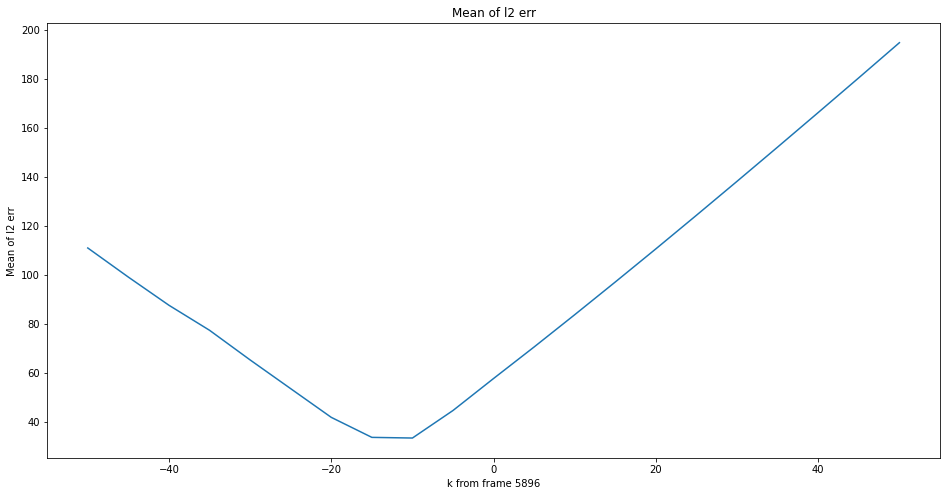

In [60]:
plt.figure(figsize=(16,8))
plt.plot(alignment_test['k'], alignment_test['mean'])
plt.title('Mean of l2 err')
plt.xlabel('k from frame 5896')
plt.ylabel('Mean of l2 err')
plt.show()

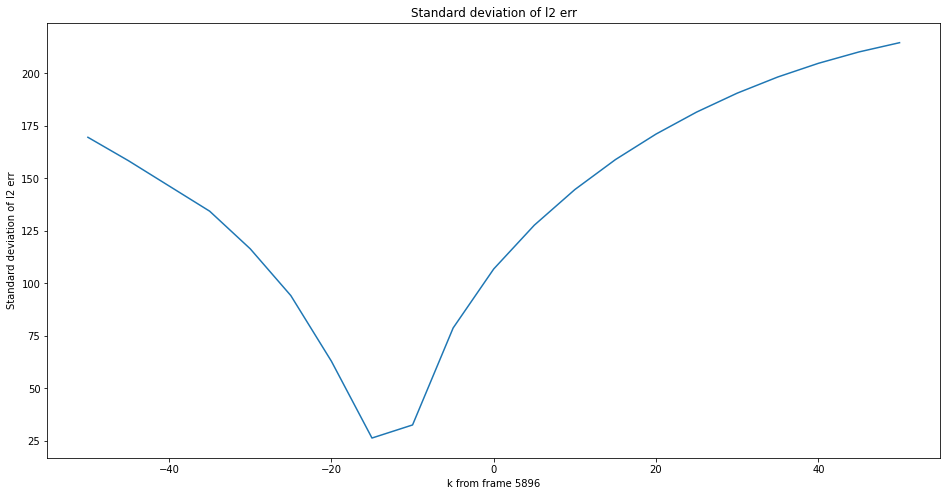

In [61]:
plt.figure(figsize=(16,8))
plt.plot(alignment_test['k'], alignment_test['std'])
plt.title('Standard deviation of l2 err')
plt.xlabel('k from frame 5896')
plt.ylabel('Standard deviation of l2 err')
plt.show()